# Illustrate Ttransformed Toy Problem 

In [1]:
# Import module. 
using Revise
using PriorNormalization

In [2]:
# Import packages. 
using ApproxFun # for approximating gammainvccdf 
using CairoMakie # for plots
using LaTeXStrings
using SpecialFunctions # for erfc 
using StatsFuns # for gammainvccdf
#using Plots: Plots, plot, plot!, scatter, scatter!, savefig, surface, surface!
#Plots.pyplot()

## Set-up the transformed toy problem

In [3]:
# Parameter of of generalized gamma hyper-prior 
r_range = [ 1.0, .5, -.5, -1.0 ]; 
β_range = [ 1.501, 3.0918, 2.0165, 1.0017 ];
ϑ_range = [ 5*10^(-2), 5.9323*10^(-3), 1.2583*10^(-3), 1.2308*10^(-4) ];

In [4]:
# Fix model parameters.
y = .2 # observational data 
σ² = 10^(-2.8) # noise variance 

0.001584893192461114

In [5]:
# We use ApproxFun.jl to build a Chebychev approximation of the function gammainvccdf(β, 1, ⋅) 
interval = -5..5

# Create an array of functions
Γinvccdfchebs_rPos = [ Fun(τ -> gammainvccdf(β, 1, 0.5*erfc(τ/sqrt(2)) ), interval) 
    for β in β_range ]
Γinvccdfchebs_rNeg = [ Fun(τ -> gammainvccdf(β, 1, 0.5 + 0.5*erf(τ/sqrt(2)) ), interval) 
    for β in β_range ]

Γinvccdfchebs = []
for i in 1:4 
    if r_range[i] > 0 
        push!(Γinvccdfchebs, Γinvccdfchebs_rPos[i])
    else 
        push!(Γinvccdfchebs, Γinvccdfchebs_rNeg[i])
    end
end

In [6]:
# Define the prior-normalized posterior density 
function posterior_transformed_pdf(u, τ; y, σ², r, β, ϑ, Φ::Function)
    log_prior = -0.5*( u^2 + τ^2 )
    x = priorNormalizing_KR_inv_tu( u, τ; r, β, ϑ, Φ ) 
    log_likelihood = -(.5/σ²) * (x-y)^2
    log_pdf = log_prior + log_likelihood
    pdf = exp( log_pdf )   
    return pdf
end

posterior_transformed_pdf (generic function with 1 method)

In [7]:
# Define the prior-normalized likelihood function 
function likelihood_transformed(u, τ; y, σ², r, β, ϑ, Φ::Function)
    x = priorNormalizing_KR_inv_tu( u, τ; r, β, ϑ, Φ ) 
    log_likelihood = -(.5/σ²) * (x-y)^2
    pdf = exp( log_likelihood )   
    return pdf
end

likelihood_transformed (generic function with 1 method)

## Visualize the contour plots

### Contour plot of transformed posterior: $r = 1$

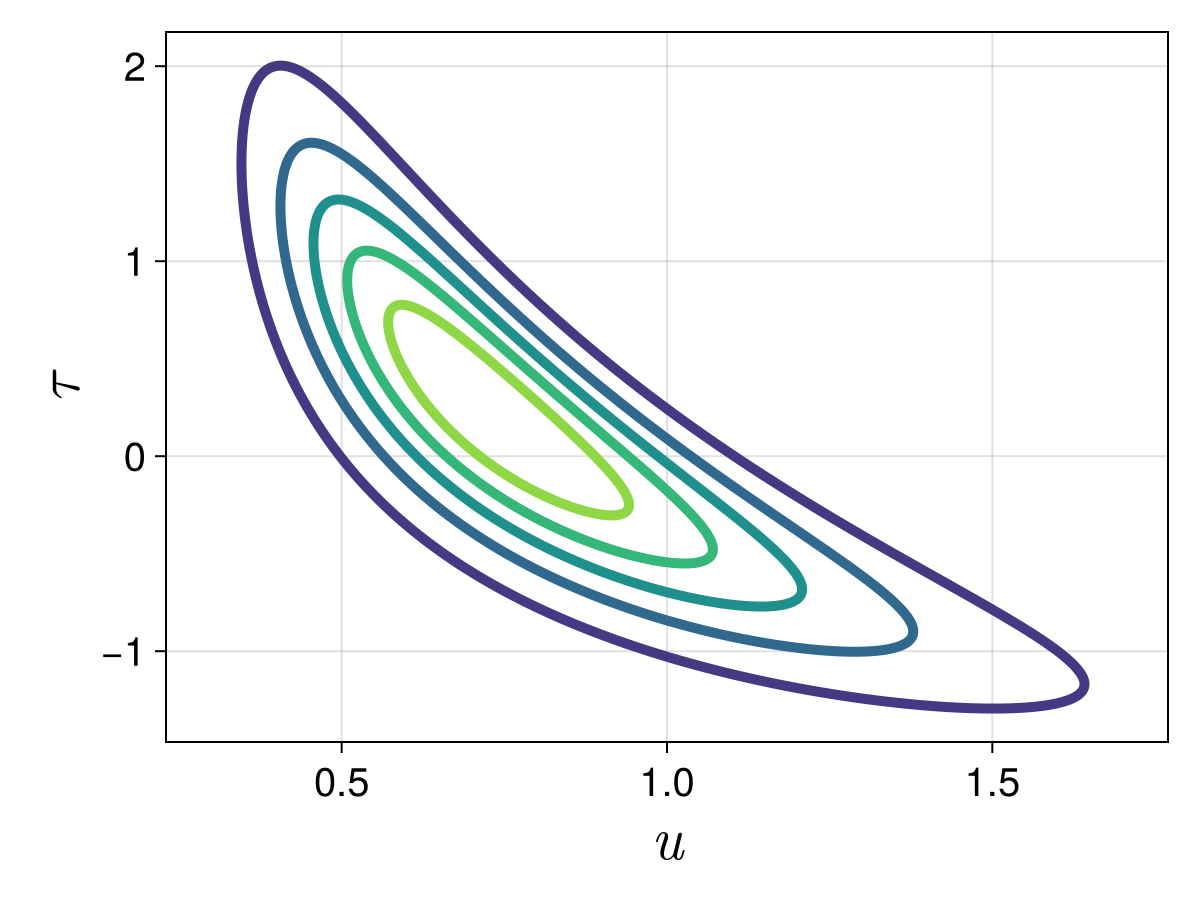

CairoMakie.Screen{PDF}


In [47]:
# Select hyper-hyper-parameters 
i = 1 
r = r_range[i] # power parameter 
β = β_range[i] # shape parameter 
ϑ = ϑ_range[i] # scale parameter 
Γinvccdfcheb = Γinvccdfchebs[i]

# Generate a grid of values for u and τ
u_range = range( 0.3, stop=1.7, length=1000 ) 
τ_range = range( -1.3, stop=2.01, length=1000 )
#u_range = range( 0.25, stop=2.85, length=1000 ) 
#τ_range = range( -1.3, stop=3.45, length=1000 )

# Evaluate the transformed posterior at each grid point
pdf_values = [ 
    posterior_transformed_pdf(u, τ; y, σ², r, β, ϑ, Φ=Γinvccdfcheb) 
    for u in u_range, τ in τ_range
]

# Contour plot 
fig_post = Figure()
ax = Axis(fig_post[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=30
ax.ylabelsize=30
ax.xticklabelsize=20
ax.yticklabelsize=20

CairoMakie.contour!(ax, u_range, τ_range, pdf_values; linewidth=5) 

display(fig_post)

# Save the plot
save("contour_posterior_toy_transformed_rp1.pdf", fig_post)  # Save as PDF

### Contour plot of transformed likelihood: $r = 1$

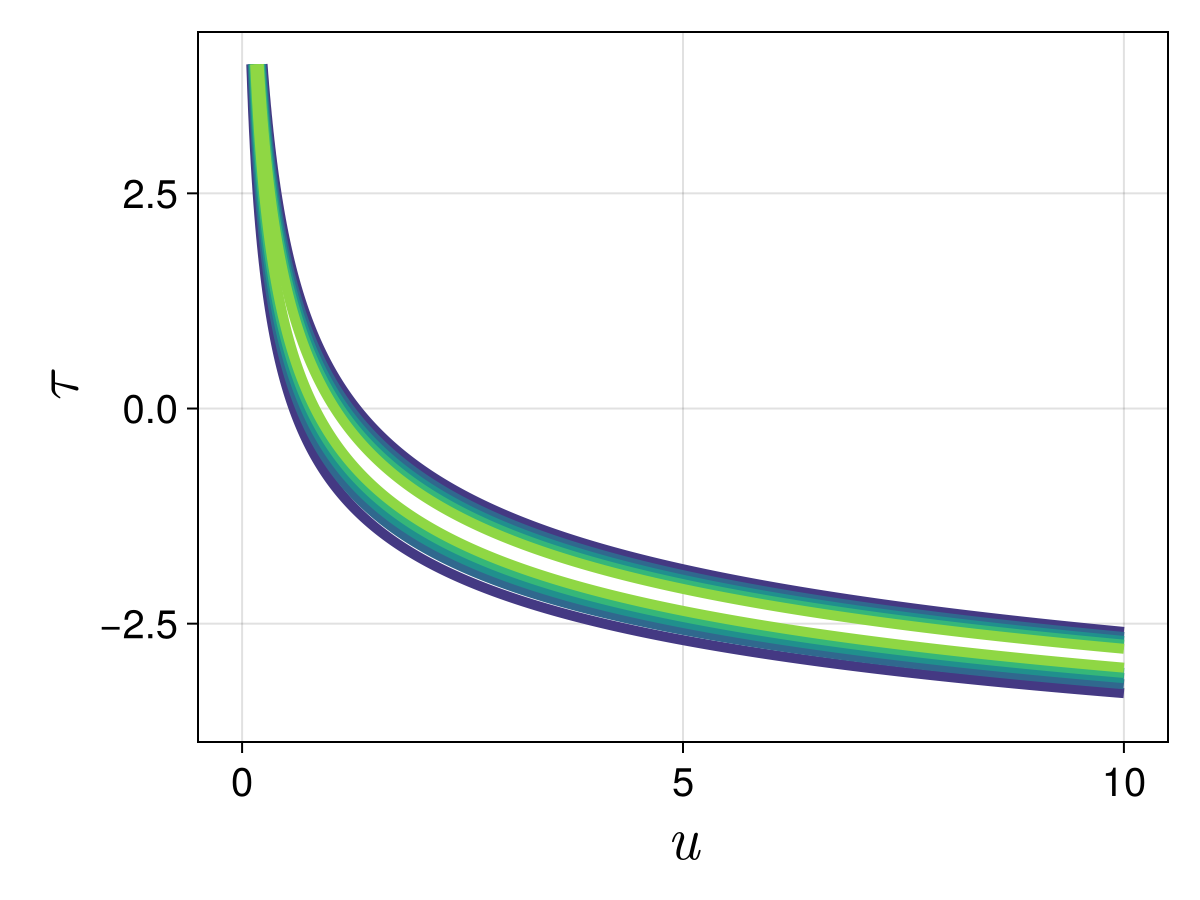

CairoMakie.Screen{PDF}


In [31]:
# Generate a grid of values for x and y
u_range = range( 0, stop=10, length=1000 ) 
τ_range = range( -3.5, stop=4, length=1000 )

# Evaluate the transformed likelihood at each grid point
likelihood_values = [ 
    likelihood_transformed(u, τ; y, σ², r, β, ϑ, Φ=Γinvccdfcheb) 
    for u in u_range, τ in τ_range
]

# Contour plot 
fig_like = Figure()
ax = Axis(fig_like[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=30
ax.ylabelsize=30
ax.xticklabelsize=20
ax.yticklabelsize=20

CairoMakie.contour!(ax, u_range, τ_range, likelihood_values; linewidth=5) 

display(fig_like)

# Save the plot
save("contour_likelihood_toy_transformed_rp1.pdf", fig_like)  # Save as PDF

### Contour plot of transformed posterior: $r = 1/2$

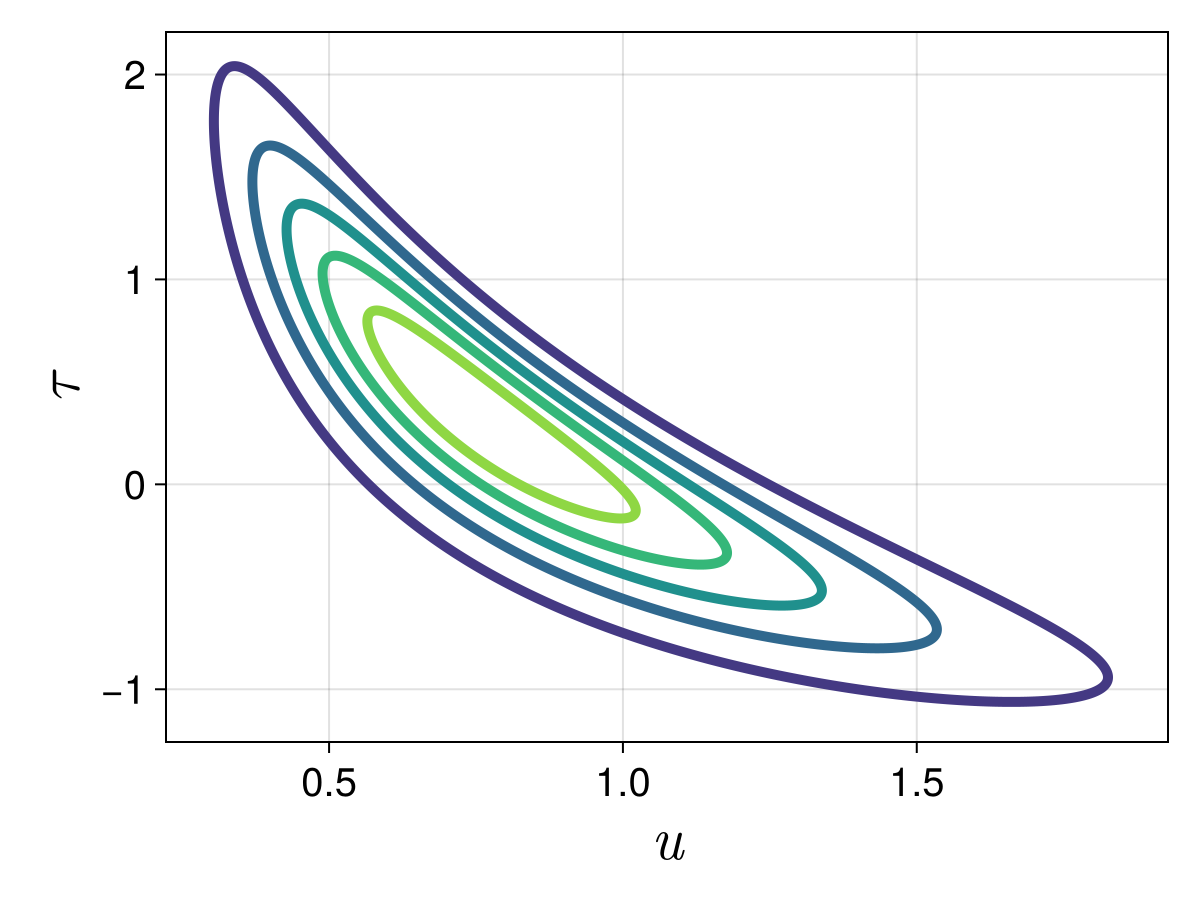

CairoMakie.Screen{PDF}


In [48]:
# Select hyper-hyper-parameters 
i = 2 
r = r_range[i] # power parameter 
β = β_range[i] # shape parameter 
ϑ = ϑ_range[i] # scale parameter 
Γinvccdfcheb = Γinvccdfchebs[i]

# Generate a grid of values for u and τ
u_range = range( 0.3, stop=1.85, length=1000 ) 
τ_range = range( -1.1, stop=2.05, length=1000 )
#u_range = range( 0.25, stop=2.85, length=1000 ) 
#τ_range = range( -1.3, stop=3.45, length=1000 )

# Evaluate the transformed posterior at each grid point
pdf_values = [ 
    posterior_transformed_pdf(u, τ; y, σ², r, β, ϑ, Φ=Γinvccdfcheb) 
    for u in u_range, τ in τ_range
]

# Contour plot 
fig_post = Figure()
ax = Axis(fig_post[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=30
ax.ylabelsize=30
ax.xticklabelsize=20
ax.yticklabelsize=20

CairoMakie.contour!(ax, u_range, τ_range, pdf_values; linewidth=5) 

display(fig_post)

# Save the plot
save("contour_posterior_toy_transformed_rp05.pdf", fig_post)  # Save as PDF

### Contour plot of transformed likelihood: $r = 1/2$

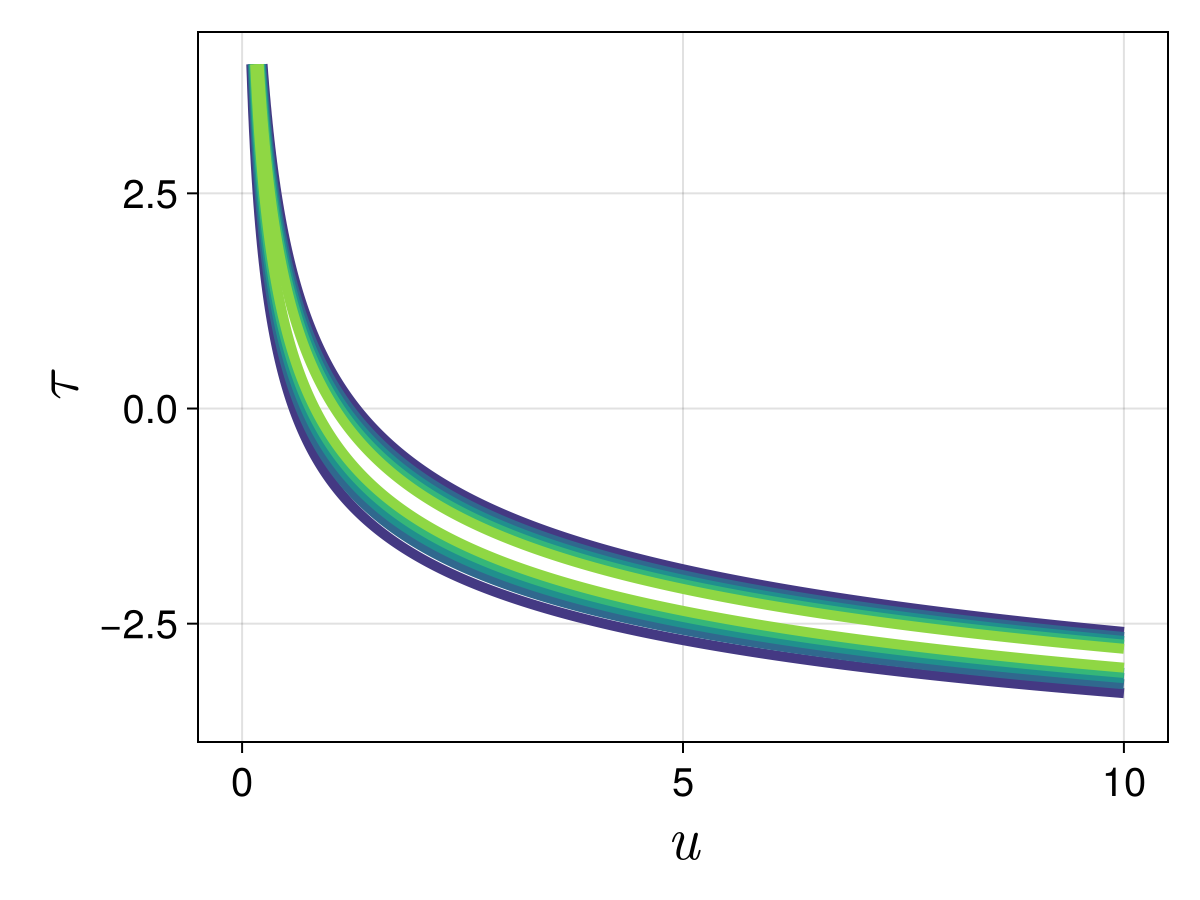

CairoMakie.Screen{PDF}


In [30]:
# Generate a grid of values for x and y
u_range = range( 0, stop=10, length=1000 ) 
τ_range = range( -3.5, stop=4, length=1000 )

# Evaluate the transformed likelihood at each grid point
likelihood_values = [ 
    likelihood_transformed(u, τ; y, σ², r, β, ϑ, Φ=Γinvccdfcheb) 
    for u in u_range, τ in τ_range
]

# Contour plot 
fig_like = Figure()
ax = Axis(fig_like[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=30
ax.ylabelsize=30
ax.xticklabelsize=20
ax.yticklabelsize=20

CairoMakie.contour!(ax, u_range, τ_range, likelihood_values; linewidth=5) 

display(fig_like)

# Save the plot
save("contour_likelihood_toy_transformed_rp05.pdf", fig_like)  # Save as PDF

### Contour plot of transformed posterior: $r = -1/2$

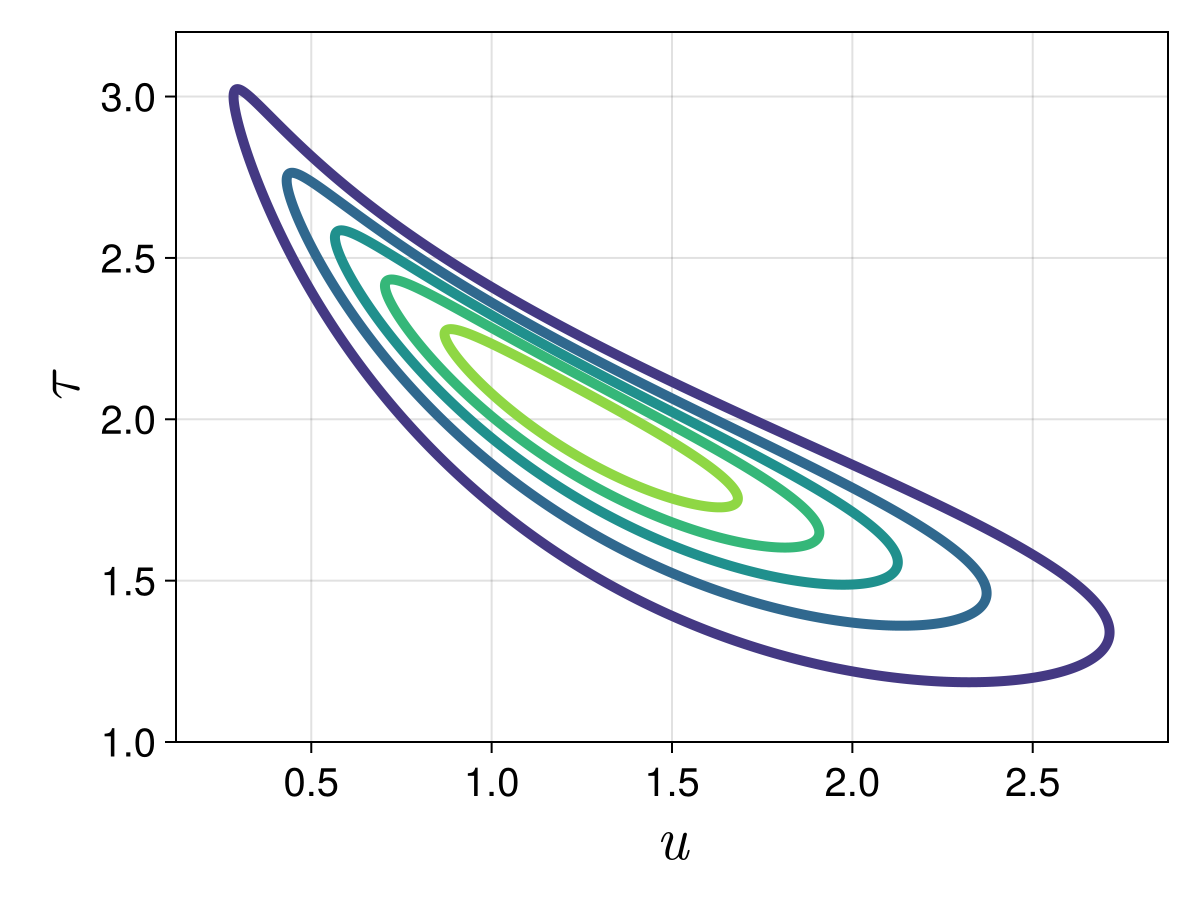

CairoMakie.Screen{PDF}


In [49]:
# Select hyper-hyper-parameters 
i = 3 
r = r_range[i] # power parameter 
β = β_range[i] # shape parameter 
ϑ = ϑ_range[i] # scale parameter 
Γinvccdfcheb = Γinvccdfchebs[i]

# Generate a grid of values for u and τ
u_range = range( 0.25, stop=2.75, length=1000 ) 
τ_range = range( 1.1, stop=3.1, length=1000 )
#u_range = range( 0.25, stop=2.85, length=1000 ) 
#τ_range = range( -1.3, stop=3.45, length=1000 )

# Evaluate the transformed posterior at each grid point
pdf_values = [ 
    posterior_transformed_pdf(u, τ; y, σ², r, β, ϑ, Φ=Γinvccdfcheb) 
    for u in u_range, τ in τ_range
]

# Contour plot 
fig_post = Figure()
ax = Axis(fig_post[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=30
ax.ylabelsize=30
ax.xticklabelsize=20
ax.yticklabelsize=20

CairoMakie.contour!(ax, u_range, τ_range, pdf_values; linewidth=5) 

display(fig_post)

# Save the plot
save("contour_posterior_toy_transformed_rm05.pdf", fig_post)  # Save as PDF

### Contour plot of transformed likelihood: $r = -1/2$

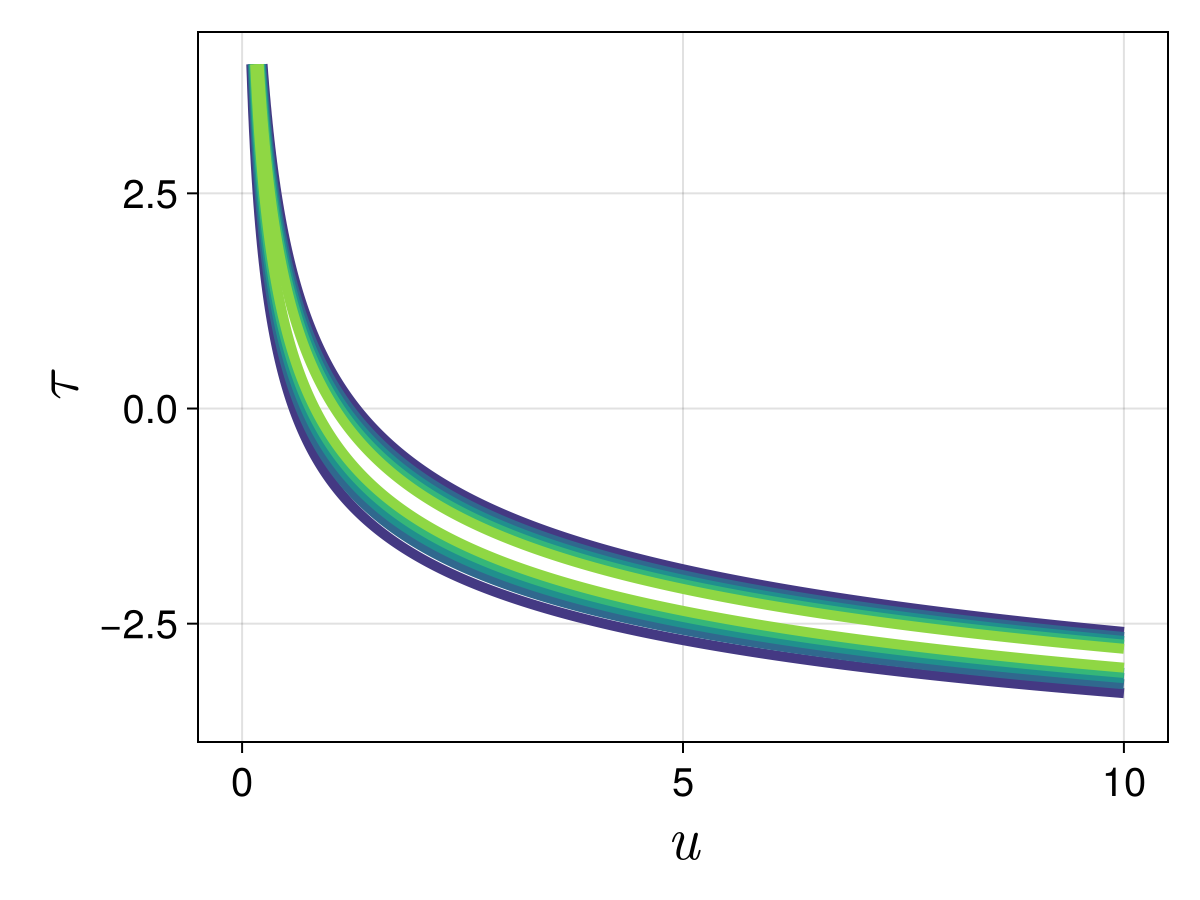

CairoMakie.Screen{PDF}


In [28]:
# Generate a grid of values for x and y
u_range = range( 0, stop=10, length=1000 ) 
τ_range = range( -3.5, stop=4, length=1000 )

# Evaluate the transformed likelihood at each grid point
likelihood_values = [ 
    likelihood_transformed(u, τ; y, σ², r, β, ϑ, Φ=Γinvccdfcheb) 
    for u in u_range, τ in τ_range
]

# Contour plot 
fig_like = Figure()
ax = Axis(fig_like[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=30
ax.ylabelsize=30
ax.xticklabelsize=20
ax.yticklabelsize=20

CairoMakie.contour!(ax, u_range, τ_range, likelihood_values; linewidth=5) 

display(fig_like)

# Save the plot
save("contour_likelihood_toy_transformed_rm05.pdf", fig_like)  # Save as PDF

### Contour plot of transformed posterior: $r = -1$

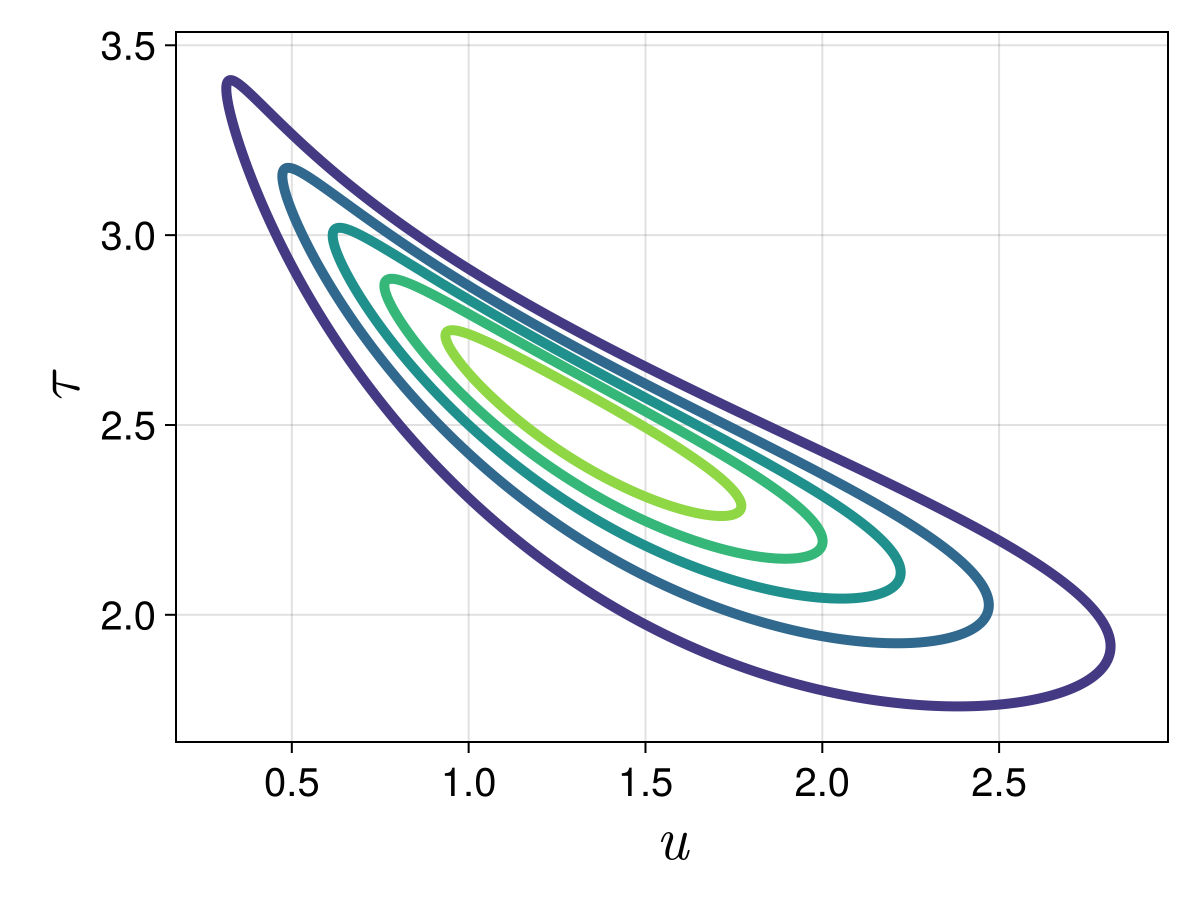

CairoMakie.Screen{PDF}


In [58]:
# Select hyper-hyper-parameters 
i = 4 
r = r_range[i] # power parameter 
β = β_range[i] # shape parameter 
ϑ = ϑ_range[i] # scale parameter 
Γinvccdfcheb = Γinvccdfchebs[i]

# Generate a grid of values for u and τ
u_range = range( 0.3, stop=2.85, length=1000 ) 
τ_range = range( 1.75, stop=3.45, length=1000 )
#u_range = range( 0.25, stop=2.85, length=1000 ) 
#τ_range = range( -1.3, stop=3.45, length=1000 )

# Evaluate the transformed posterior at each grid point
pdf_values = [ 
    posterior_transformed_pdf(u, τ; y, σ², r, β, ϑ, Φ=Γinvccdfcheb) 
    for u in u_range, τ in τ_range
]

# Contour plot 
fig_postTrans = Figure()
ax = Axis(fig_postTrans[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=30
ax.ylabelsize=30
ax.xticklabelsize=20
ax.yticklabelsize=20

CairoMakie.contour!(ax, u_range, τ_range, pdf_values; linewidth=5) 

display(fig_postTrans)

# Save the plot
save("contour_posterior_toy_transformed_rm1.pdf", fig_postTrans)  # Save as PDF

### Contour plot of transformed likelihood: $r = -1$

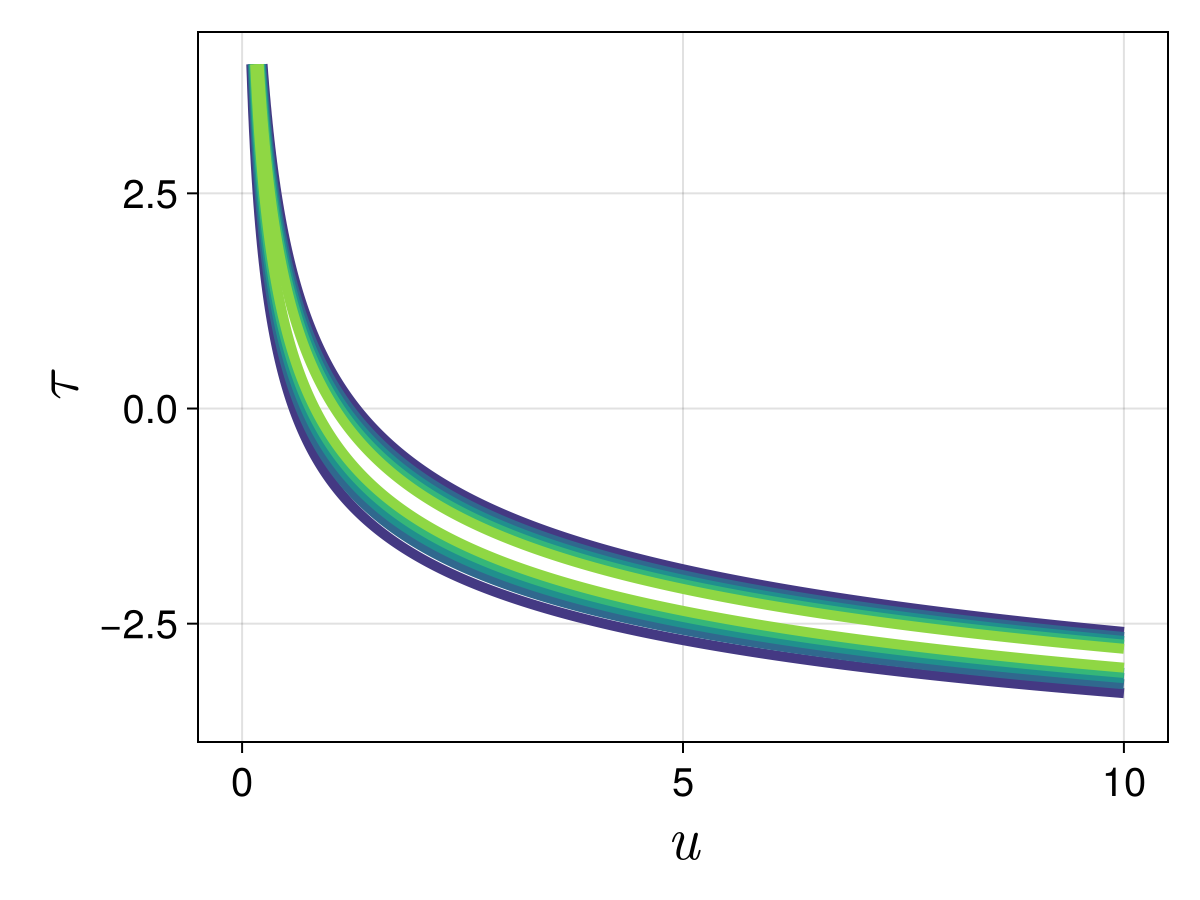

CairoMakie.Screen{PDF}


In [29]:
# Generate a grid of values for x and y
u_range = range( 0, stop=10, length=1000 ) 
τ_range = range( -3.5, stop=4, length=1000 )

# Evaluate the transformed likelihood at each grid point
likelihood_values = [ 
    likelihood_transformed(u, τ; y, σ², r, β, ϑ, Φ=Γinvccdfcheb) 
    for u in u_range, τ in τ_range
]

# Contour plot 
fig_likeTrans = Figure()
ax = Axis(fig_likeTrans[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=30
ax.ylabelsize=30
ax.xticklabelsize=20
ax.yticklabelsize=20

CairoMakie.contour!(ax, u_range, τ_range, likelihood_values; linewidth=5) 

display(fig_likeTrans)

# Save the plot
save("contour_likelihood_toy_transformed_rm1.pdf", fig_likeTrans)  # Save as PDF